# Data Mining Project


Dataset:
House Price (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
# 即时生成图片
%matplotlib inline

# 隠藏Wranning 
import warnings
warnings.filterwarnings("ignore")



# 1. 导入数据集


In [2]:
# import train.csv
dataset = pd.read_csv("data/train.csv")
print(f'Dataset size: {dataset.shape}')
print(f'{"Column Name":<16}Data Type')
dataset.info()

# Id 在数据集中只用来辨识数据行, 所以可以刪去
dataset = dataset.drop('Id',axis=1)
print(f'After Delete, Dataset size: {dataset.shape}')



Dataset size: (1460, 81)
Column Name     Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  O

#  2. 数据预处理

## 2.1 目标变量分布

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


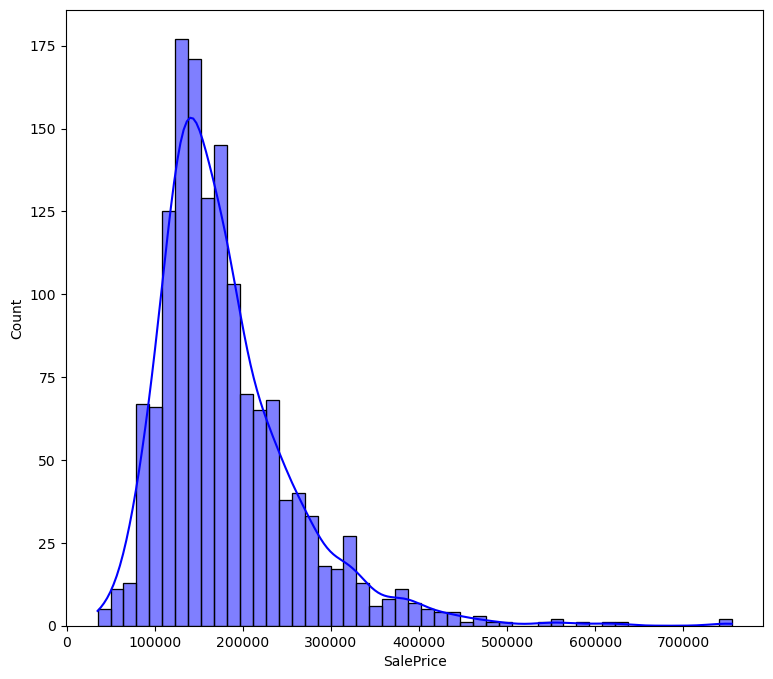

In [3]:
print(dataset['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['SalePrice'], color='b', kde=True);

## 2.2 其他变量分布

In [4]:
# 记录数值类型的 column
numberColumn = list()
for name, dtype in dataset.dtypes.iteritems():
    if dtype != object:
        numberColumn.append(name)
# 最后一项的 salePrice 已经画过故去除
numberColumn.pop()
numberDataset = dataset[numberColumn].copy()
numberDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

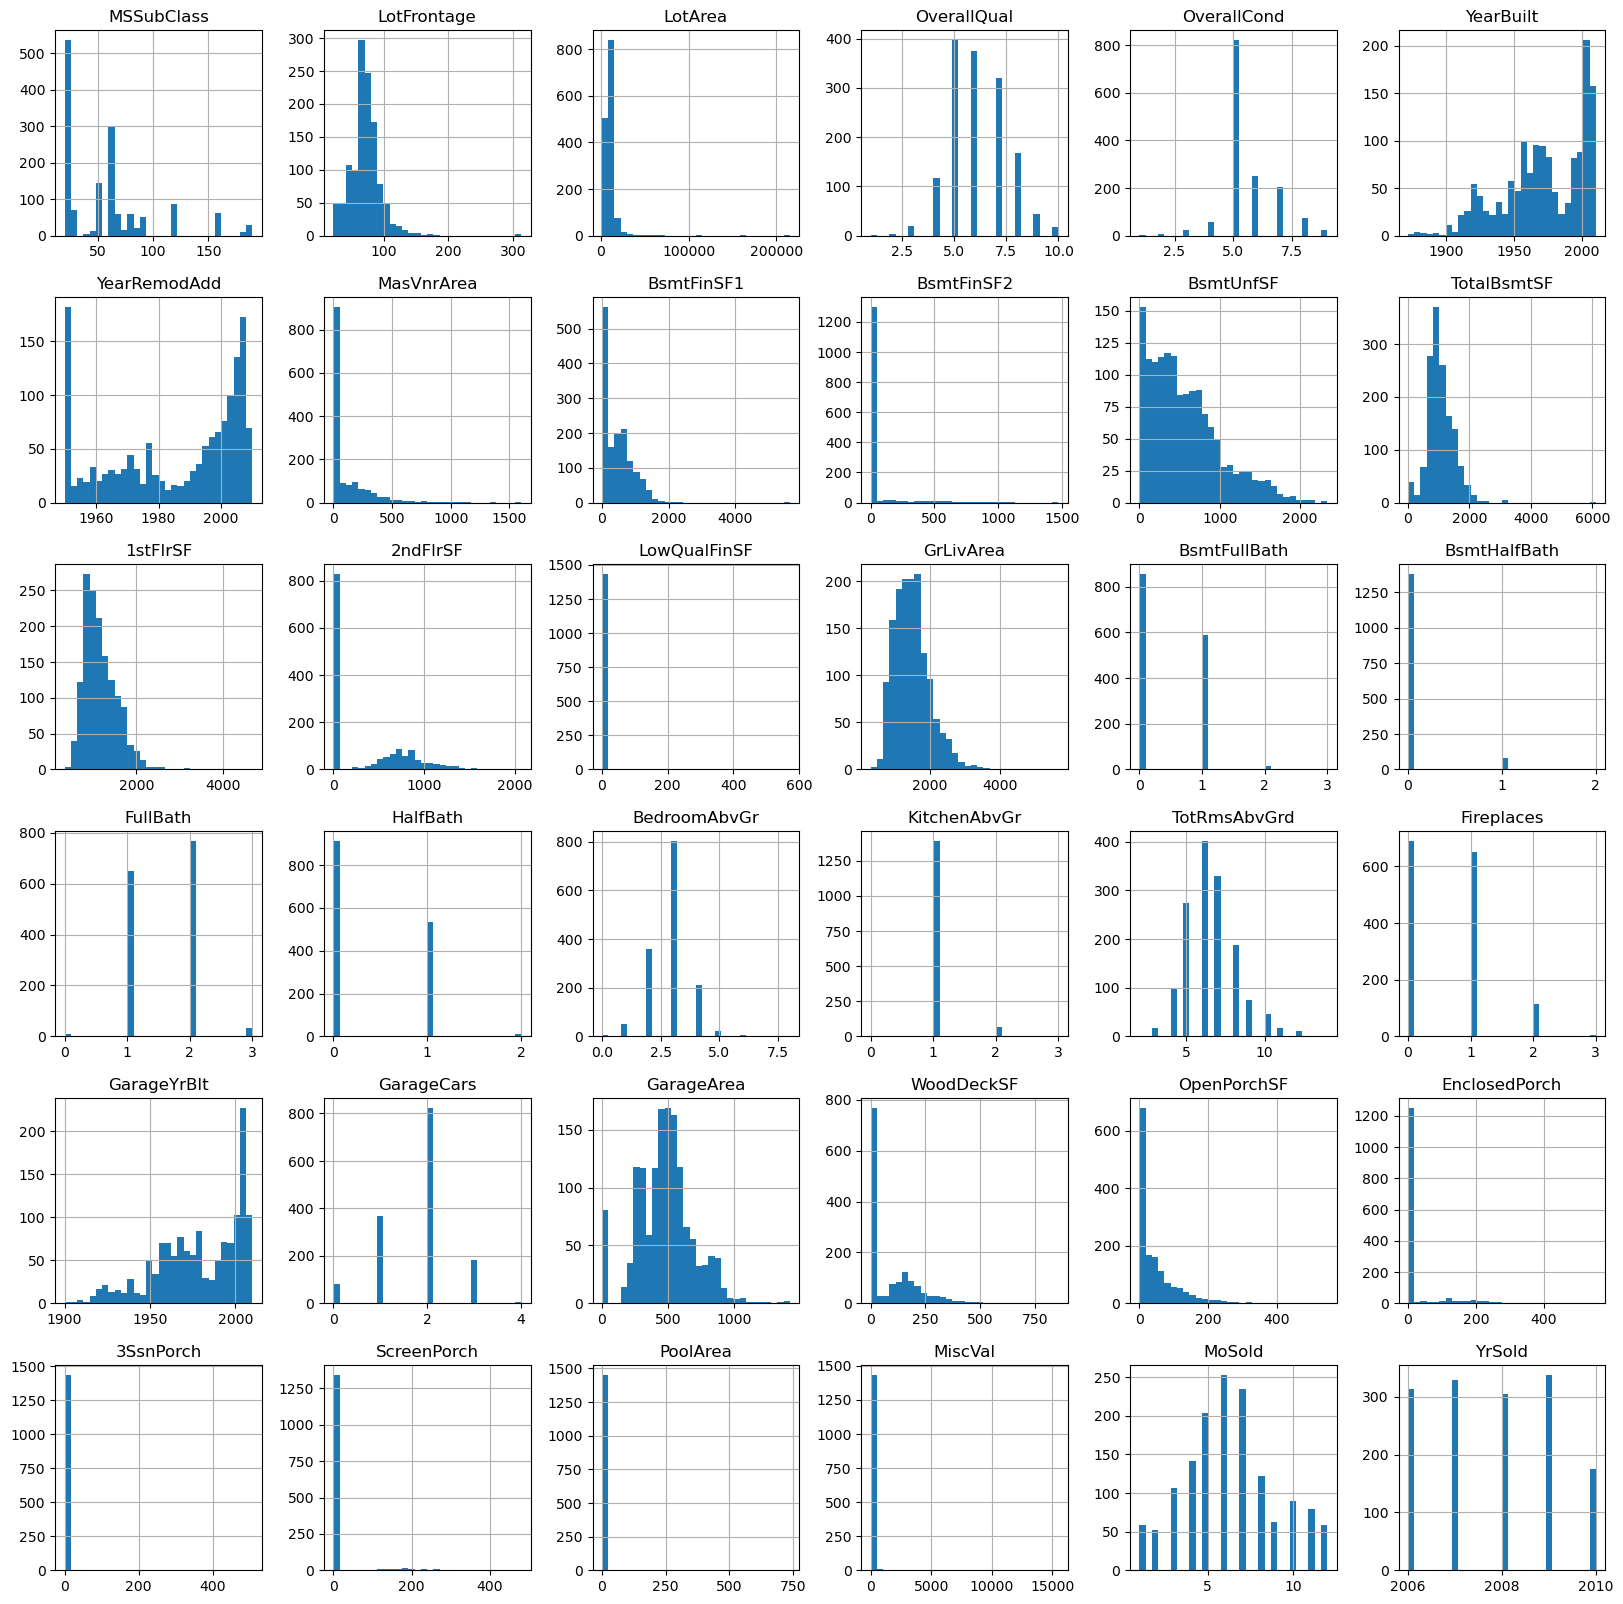

In [5]:
numberDataset.hist(figsize=(20, 20), bins=30);


# 2.3 填补缺失数据
通过对数据集進行观察, 并对其缺失值进行处理

## 2.3.1 使用0填充

由于一些数据 NA 是因为没有该项目, 所以可以直接使用 0 去填充
因为一些房屋没有车库, 所以以下数据的 NA 值, 可以用 0 代替
* GarageCars, Size of garage in car capacity
* GarageArea, Size of garage in square feet

因为一些房屋没有地库, 所以以下数据的 NA 值, 可以用 0 代替
* BsmtFinSF1, Type 1 finished square feet
* BsmtFinSF2, Type 2 finished square feet
* BsmtUnfSF, Unfinished square feet of basement area
* TotalBsmtSF, Total square feet of basement area
* BsmtFullBath, Basement full bathrooms
* BsmtHalfBath, Basement half bathrooms

因为一些房屋没有贴砖墙(Masonry veneer area) 所以 NA 值可以使用 0 代替
* MasVnrArea, Masonry veneer area in square feet



In [6]:
# use 0 to fill NA in following Variable
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(0)

dataset['BsmtHalfBath']=dataset['BsmtHalfBath'].fillna(0)
dataset['BsmtFullBath']=dataset['BsmtFullBath'].fillna(0)
dataset['TotalBsmtSF']=dataset['TotalBsmtSF'].fillna(0)
dataset['BsmtUnfSF']=dataset['BsmtUnfSF'].fillna(0)
dataset['BsmtFinSF2']=dataset['BsmtFinSF2'].fillna(0)
dataset['BsmtFinSF1']=dataset['BsmtFinSF1'].fillna(0)

dataset['GarageArea']=dataset['GarageArea'].fillna(0)
dataset['GarageCars']=dataset['GarageCars'].fillna(0)
#dataset.info()

## 2.3.2 使用中位数填充
有一些数据是比较特殊的, 比如年份, 使用 0 去填充会影响整体结果, 所以采用中位数去填充, 用以避免使用 0 破坏了原本数据的分布
因为一些房屋没有车库, 所以 GarageYrBlt, 用整组数据的中位数代替
* GarageYrBlt, Year garage was built

In [7]:
# Use median to fill NA in following Variable
dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].median())


## 2.3.3 使用相似数据填充
LotFrontage, Linear feet of street connected to property 是指房屋与街道的距離, 因此, 我们采用相同地区邻区的中位数去代替, 既补充了该房屋的数据, 又不会对数据集有太大影响


In [8]:
### Use neighbors to fill
# 按地区分组计算该地区的中位数, 并转化成字典方便之后获取数据
LotFrontageMedians = dataset.groupby('Neighborhood')['LotFrontage'].median().to_dict()

# 复制本身 LotFrontage Column 
newLotFrontage = dataset['LotFrontage']
for i in range(0,len(dataset)):
    # 寻找 NA
    if pd.isna(dataset['LotFrontage'][i]):

        # 把 NA 改为该房屋所在地区的中位数
        newLotFrontage[i] = LotFrontageMedians[dataset['Neighborhood'][i]]


# 把修改后的 Column 取代 dataset 原本的 Column
dataset['LotFrontage']=newLotFrontage
print(dataset['LotFrontage'].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None


## 2.3.4 根据数值定义填充
还有一些数据本身是字符类型, 所以我们根据该栏位的实际含义去填充相应的数据

因为以下栏位NA代表没有该项目, 所以我们以 None 去填充
* Alley, Type of alley access to property, NA 表示没有胡同(Alley), 所以使用 None 代替
* PoolQC, Pool quality, NA 表示没有泳池(Pool), 所以使用 None 代替
* Fence, Fence quality, NA 表示没有栅栏(Fence), 所以使用 None 代替
* MiscFeature, Miscellaneous feature not covered in other categories, NA 表示没有其他杂项, 所以使用 None 代替
* FireplaceQu, Fireplace quality,  NA 表示没有壁炉(Fireplace), 所以使用 None 代替
* MasVnrType, Masonry veneer type, 因为一些房屋没有贴砖墙(Masonry veneer area) 所以 NA 值可以使用 None 代替

因为有一些房屋没有车库, 所以以下数据的 NA 值, 可以用 None 代替
* GarageType, Garage location
* GarageFinish, Interior finish of the garage
* GarageQual, Garage quality
* GarageCond, Garage condition

因为有一些房屋没有地库, 所以以下数据的 NA 值, 可以用 None 代替
* BsmtQual, Evaluates the height of the basement
* BsmtCond, Evaluates the general condition of the basement
* BsmtExposure, Refers to walkout or garden level walls
* BsmtFinType1, Rating of basement finished area
* BsmtFinType2, Rating of basement finished area (if multiple types)


In [9]:
dataset['Alley'] = dataset['Alley'].fillna("None")
dataset['PoolQC'] = dataset['PoolQC'].fillna("None")
dataset['Fence'] = dataset['Fence'].fillna("None")
dataset['MiscFeature'] = dataset['MiscFeature'].fillna("None")
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna("None")
dataset['MasVnrType'] = dataset['MasVnrType'].fillna("None")

dataset['GarageType'] = dataset['GarageType'].fillna("None")
dataset['GarageFinish'] = dataset['GarageFinish'].fillna("None")
dataset['GarageQual'] = dataset['GarageQual'].fillna("None")
dataset['GarageCond'] = dataset['GarageCond'].fillna("None")

dataset['BsmtQual'] = dataset['BsmtQual'].fillna("None")
dataset['BsmtCond'] = dataset['BsmtCond'].fillna("None")
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna("None")
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna("None")
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna("None")



## 2.3.5 使用众数填充
Electrical 栏位缺少了一项, 以 NA 又没有定义, 可以判断为数据有错漏, 所以使用出现最多的情況去填充有关数据, 使其不会破坏数据分布
* Electrical, Electrical system

In [10]:
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

#  2.4 移除异常项及可视化

## 2.4.1 面积与售价
一般而言, 面积越大, 售价越高, 故我们使用面积与售价进行散点图观察
### 2.4.1.1 地上面积

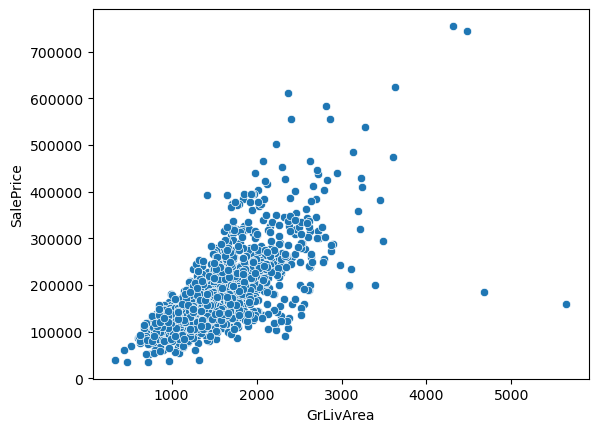

In [11]:
sns.scatterplot(data=dataset, x='GrLivArea', y='SalePrice');

可以明显看出有2个面积最大的房屋, 售价却很低, 所以我们去除掉这2个项目

In [12]:
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4500) & (dataset['SalePrice']<190000)].index)

### 2.4.1.2 地库面积

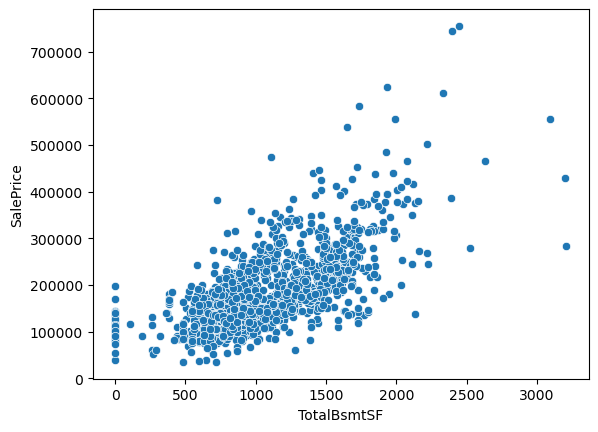

In [13]:
sns.scatterplot(data=dataset, x='TotalBsmtSF', y='SalePrice');

可以从上图看到地库面积中並没有偏離现实售价的房屋

## 2.4.2 房屋评价

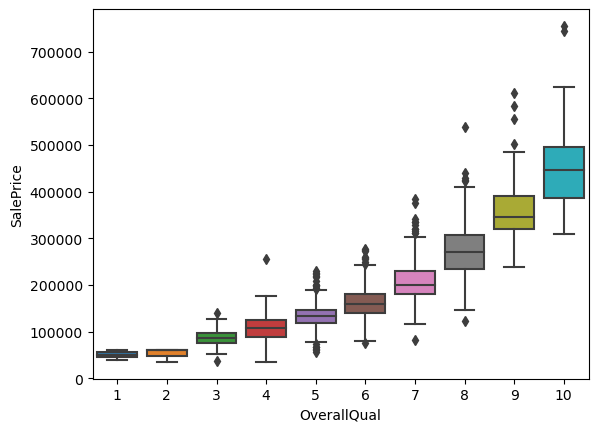

In [14]:
sns.boxplot(data=dataset, x='OverallQual', y='SalePrice');

可以看出, 除了少数房屋外, 大多数房屋的售价与其评价呈正相关, 有些房屋可能因为地段/面积等问题导致评分一致, 但售价最高与最低差距出现较大

## 2.4.3 房屋年份

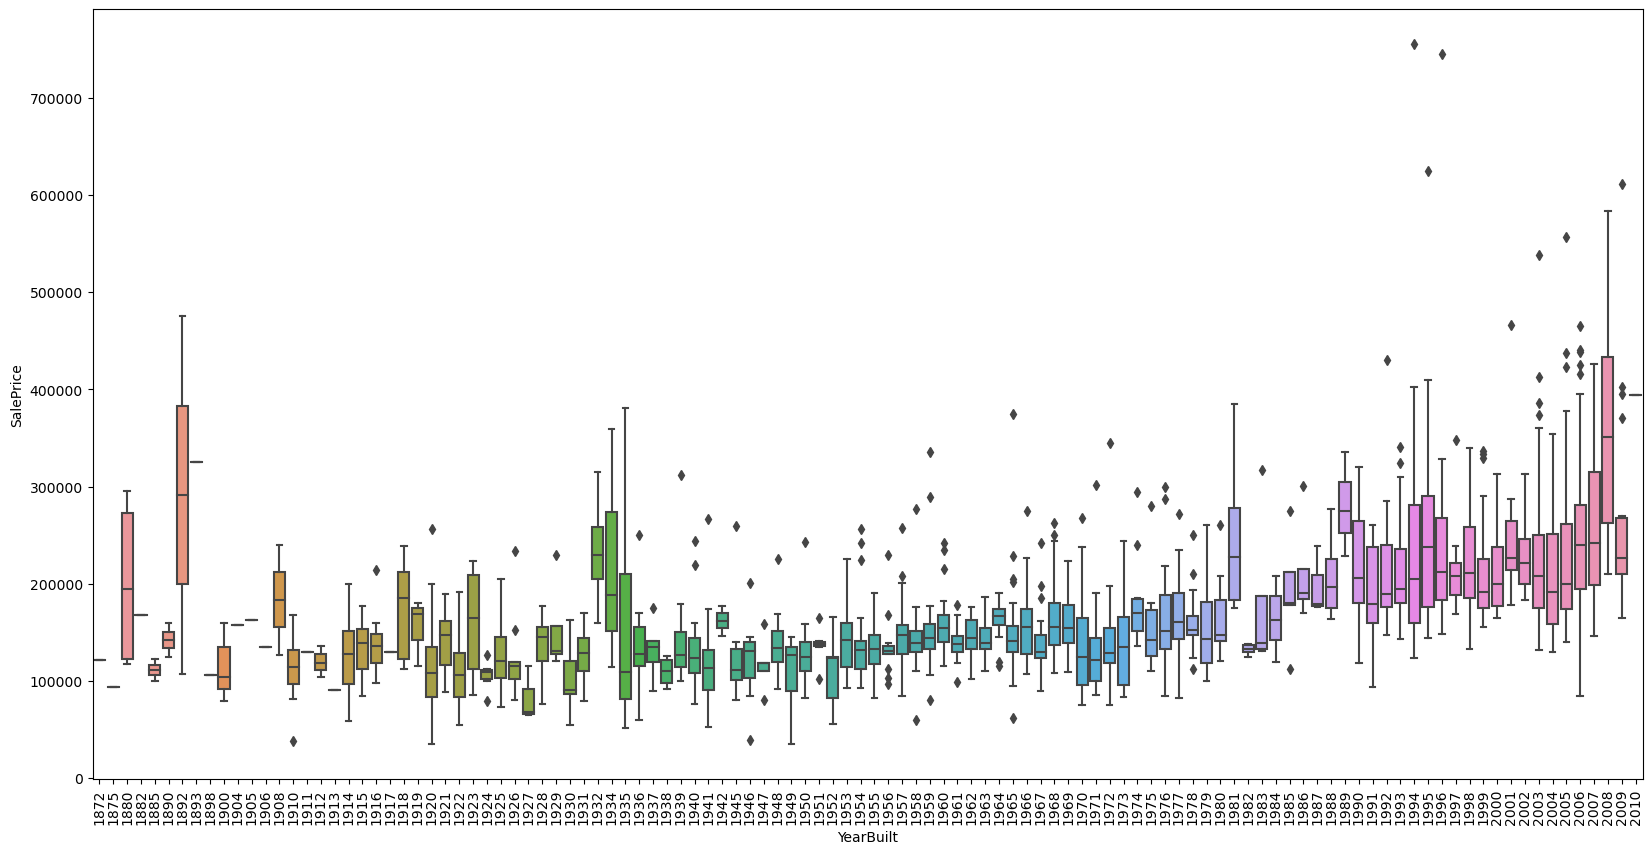

In [15]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=dataset, x='YearBuilt', y='SalePrice');

能夠看到房屋的年份与售价的相关性不太高, 老旧的及最新的都比较贵, 但也可能因为其他原因导致

## 2.4.4  数据分布直方图
经过数据清洗后, 每个栏位的直方图如下

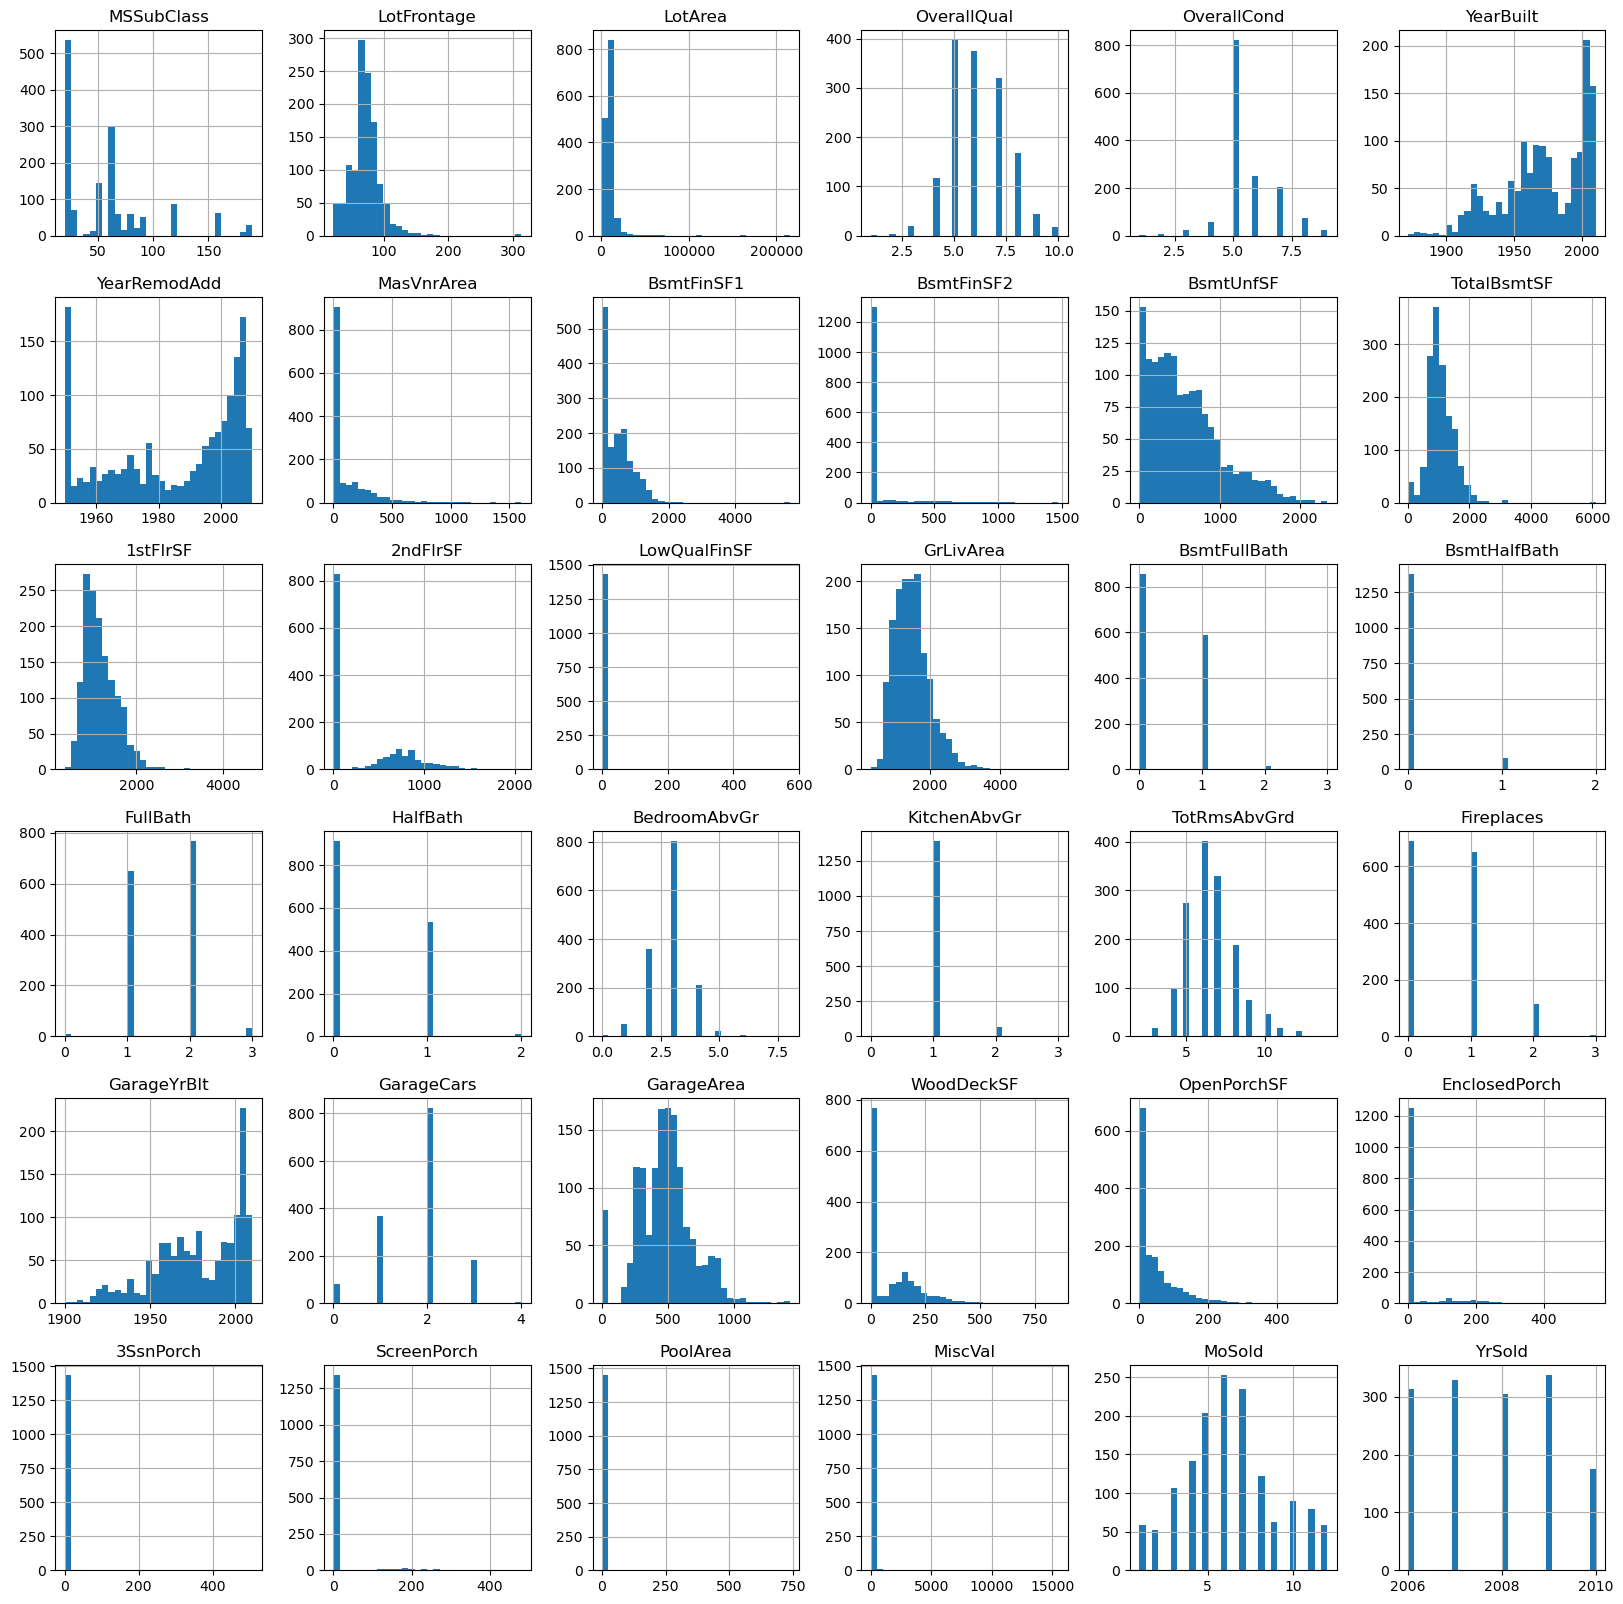

In [16]:
newNumberDataset = dataset[numberColumn].copy()
numberDataset.hist(figsize=(20, 20), bins=30);

## 2.4.5 QQ图


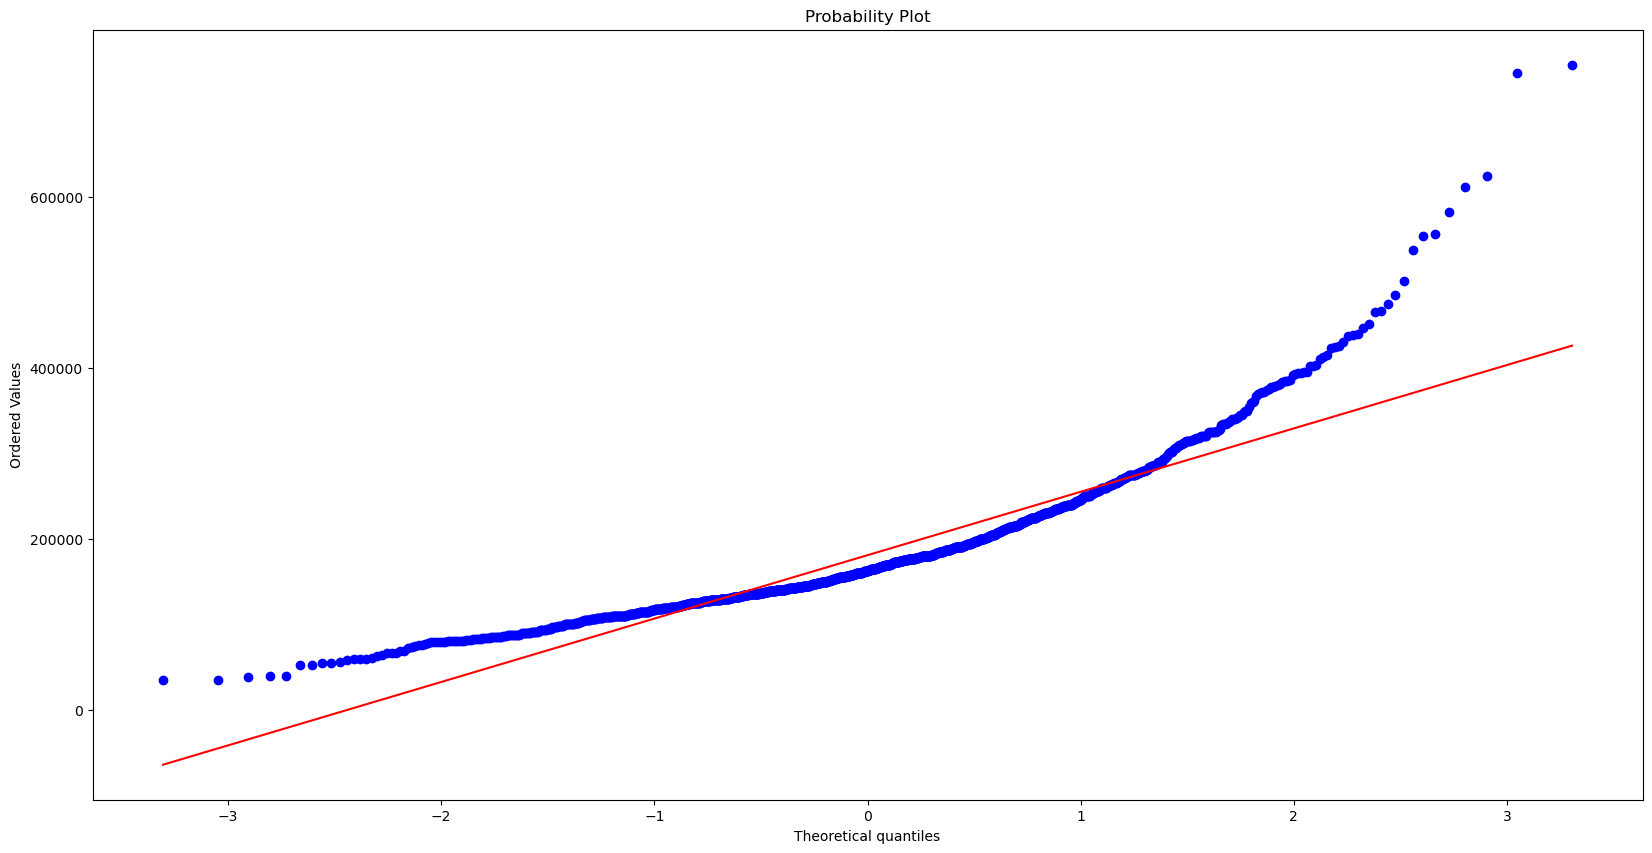

In [17]:
plt.figure(figsize=(20,10))
stats.probplot(dataset['SalePrice'], plot=plt);

从 QQ 图中可以看出SalePrice 并不是标准正态分布, 呈现了偏态分布
我们对其进行对数变換, 希望能夠变回正态分布

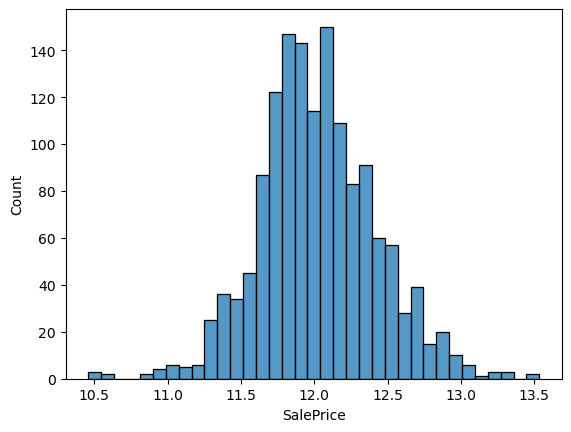

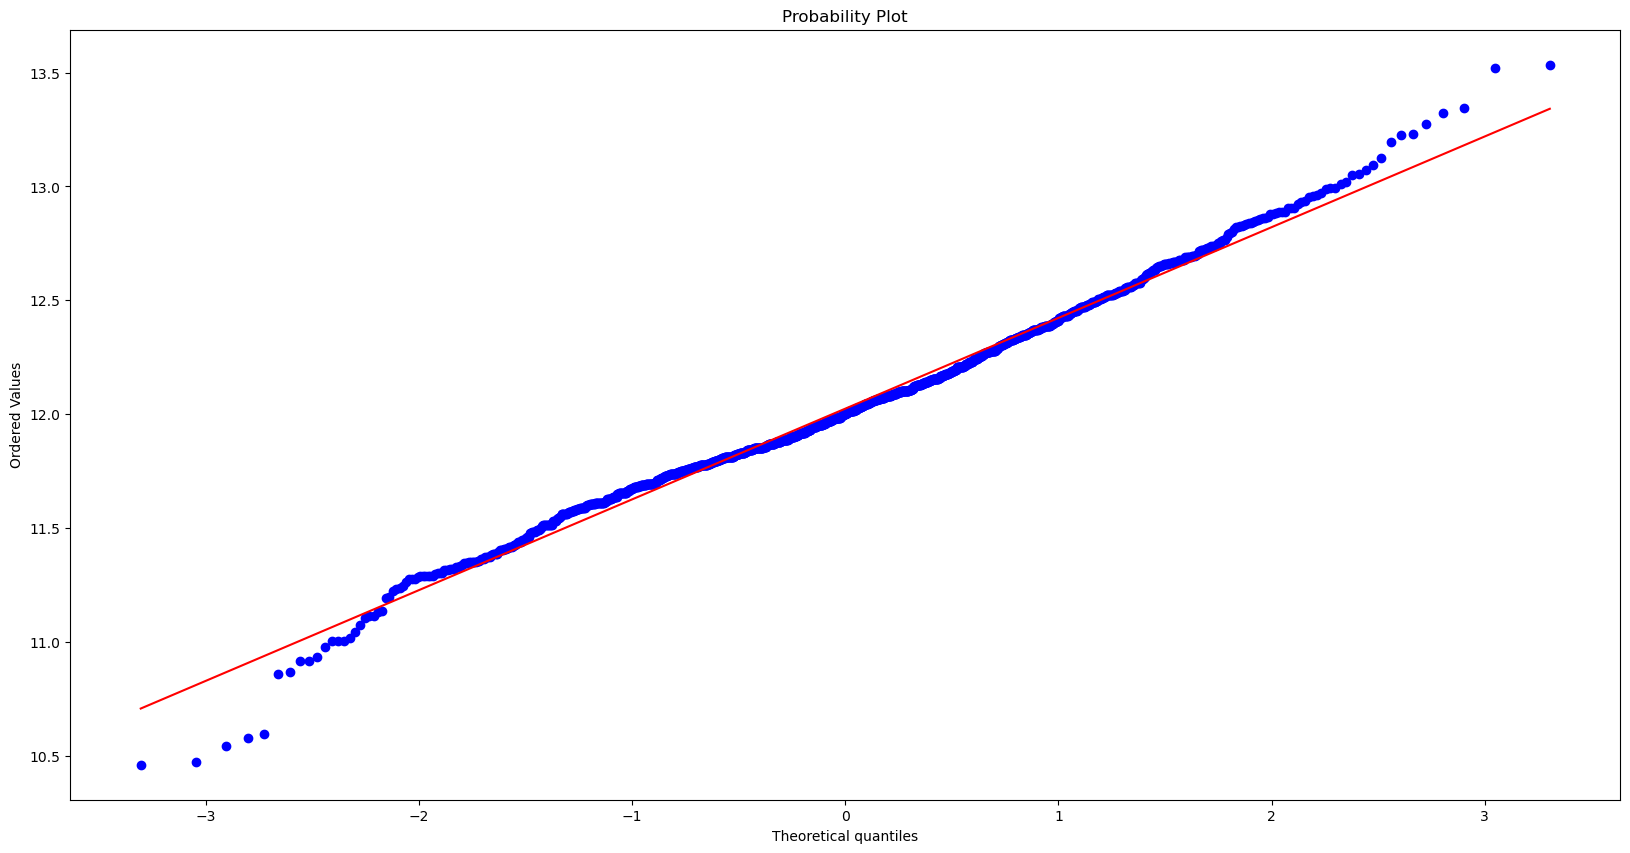

In [18]:
# 复制数据集以避免对其他图表产生影响
newDataset = dataset
# 对数变换
newDataset['SalePrice'] = np.log1p(newDataset['SalePrice'])

# 绘制新分布图
sns.histplot(newDataset['SalePrice']);

# 绘制新 QQ 图
plt.figure(figsize=(20,10))
stats.probplot(newDataset['SalePrice'], plot=plt);

可以看出经过数据预处理及对数变換后, 售价较为符合正态分布, 后续要进行数据预测时, 应该采用处理后的数据
# 3. 聚类
再进行聚类之前, 我们先把 train 数据集分割, 切分为测试用和验证用, 用来评估性能效果

In [19]:
dataset.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.992112,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.189986,438.827160,46.613169,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,12.024015
std,42.329437,21.469099,9859.198156,1.376369,1.113359,30.193754,20.641760,179.109864,432.969094,161.420729,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,0.399713
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774720
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,163.750000,711.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


# 3.1 聚类可视化
以下部份我们將对不同的标签与售价进行分类并可视化结果, 方便我们进行观察

### 3.2.1 评价与售价
我们首先使用评价对房屋售价进行 k-means 聚类, 因为评价与售价大多呈正相关
并且在进行 k-means 聚类前对数据进行标准化

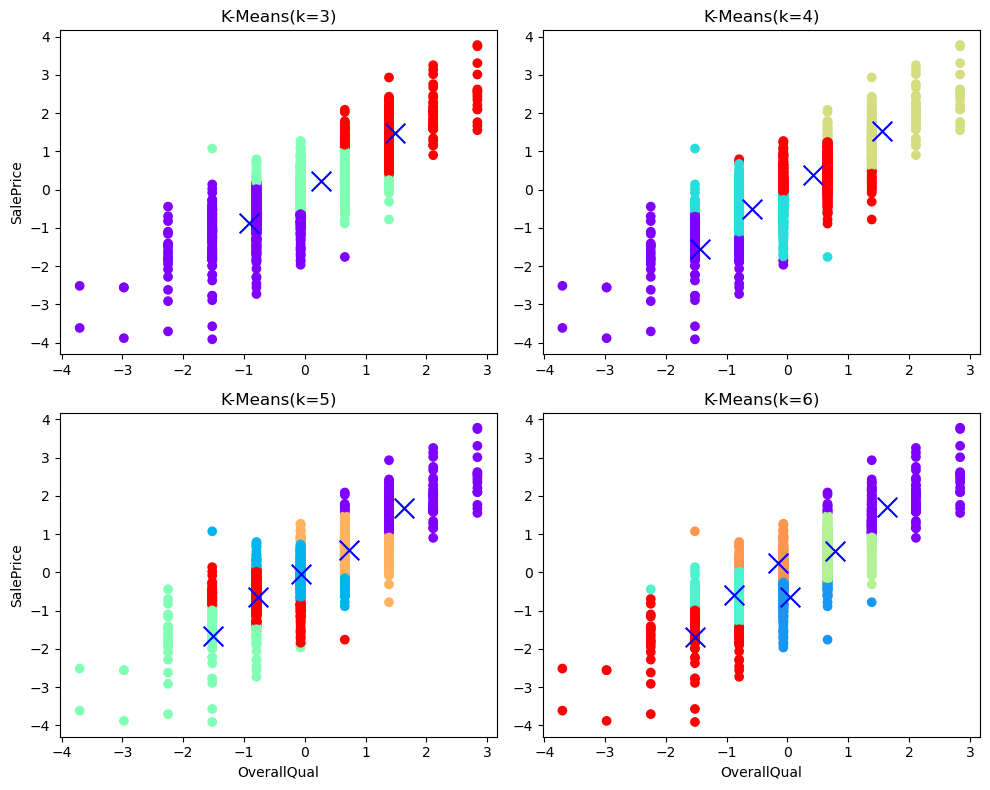

In [20]:
# 引入库进数据标准化
from sklearn import preprocessing

# 引入KMeans聚类库
from sklearn.cluster import KMeans



# 聚类数据
clusteringData = dataset[['OverallQual', 'SalePrice']].values
# 标准化数据
t = preprocessing.StandardScaler().fit(clusteringData)
stdClusteringData = t.transform(clusteringData)
# 聚类输出颜色
colors = ['r', 'g', 'b', 'y', 'c', 'm']


# 设置不同K值的聚类模型, 用来进行不同数量聚群的效果
kmeans3 = KMeans(n_clusters=3)
kmeans4 = KMeans(n_clusters=4)
kmeans5 = KMeans(n_clusters=5)
kmeans6 = KMeans(n_clusters=6)

kmeans3.fit(stdClusteringData)
kmeans4.fit(stdClusteringData)
kmeans5.fit(stdClusteringData)
kmeans6.fit(stdClusteringData)

# 调用 kemans 算法
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(stdClusteringData[:, 0], stdClusteringData[:, 1], c=kmeans3.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.ylabel('SalePrice')
plt.title('K-Means(k=3)')

plt.subplot(2, 2, 2)
plt.scatter(stdClusteringData[:, 0], stdClusteringData[:, 1], c=kmeans4.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans4.cluster_centers_[:, 0],kmeans4.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
#plt.ylabel('SalePrice')
plt.title('K-Means(k=4)')

plt.subplot(2, 2, 3)
plt.scatter(stdClusteringData[:, 0], stdClusteringData[:, 1], c=kmeans5.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans5.cluster_centers_[:, 0],kmeans5.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.title('K-Means(k=5)')


plt.subplot(2, 2, 4)
plt.scatter(stdClusteringData[:, 0], stdClusteringData[:, 1], c=kmeans6.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans6.cluster_centers_[:, 0],kmeans6.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.xlabel('OverallQual')
plt.title('K-Means(k=6)')

# 自动调整子图的布局
plt.tight_layout()
plt.show()


图中展示了房屋评价与售价分別进行4-7个中心的 k-means 聚类时的情況, 不同的颜色表示不同的聚类, X为各个聚类的质心

### 3.2.2 地上面积与售价
我们使用房屋地上面积对房屋售价进行 k-means 聚类, 因为评价与售价大多呈正相关
并且在进行 k-means 聚类前对数据进行标准化

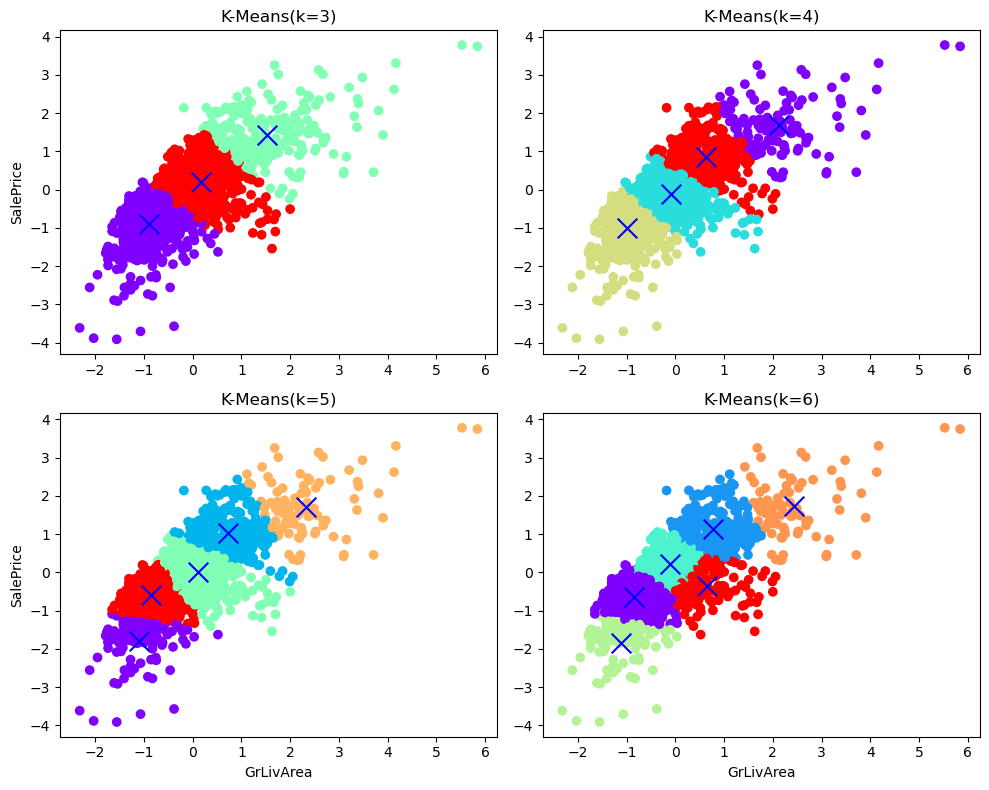

In [21]:
# 引入库进数据标准化
from sklearn import preprocessing

# 引入KMeans聚类库
from sklearn.cluster import KMeans



# 聚类数据
clusteringData2 = dataset[['GrLivArea', 'SalePrice']].values
# 标准化数据
t = preprocessing.StandardScaler().fit(clusteringData2)
stdClusteringData2 = t.transform(clusteringData2)

# 设置不同K值的聚类模型, 用来进行不同数量聚群的效果
kmeans3 = KMeans(n_clusters=3)
kmeans4 = KMeans(n_clusters=4)
kmeans5 = KMeans(n_clusters=5)
kmeans6 = KMeans(n_clusters=6)

kmeans3.fit(stdClusteringData2)
kmeans4.fit(stdClusteringData2)
kmeans5.fit(stdClusteringData2)
kmeans6.fit(stdClusteringData2)

# 调用 kemans 算法
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(stdClusteringData2[:, 0], stdClusteringData2[:, 1], c=kmeans3.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.ylabel('SalePrice')
plt.title('K-Means(k=3)')

plt.subplot(2, 2, 2)
plt.scatter(stdClusteringData2[:, 0], stdClusteringData2[:, 1], c=kmeans4.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans4.cluster_centers_[:, 0],kmeans4.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
#plt.ylabel('SalePrice')
plt.title('K-Means(k=4)')

plt.subplot(2, 2, 3)
plt.scatter(stdClusteringData2[:, 0], stdClusteringData2[:, 1], c=kmeans5.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans5.cluster_centers_[:, 0],kmeans5.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.title('K-Means(k=5)')


plt.subplot(2, 2, 4)
plt.scatter(stdClusteringData2[:, 0], stdClusteringData2[:, 1], c=kmeans6.labels_, marker='o',cmap='rainbow')
plt.scatter(kmeans6.cluster_centers_[:, 0],kmeans6.cluster_centers_[:, 1], c='b', marker='x',cmap='rainbow', s=200)
plt.xlabel('GrLivArea')
plt.title('K-Means(k=6)')

# 自动调整子图的布局
plt.tight_layout()
plt.show()


图中展示了房屋地上面积与售价分別进行4-7个中心的 k-means 聚类时的情況, 不同的颜色表示不同的聚类, X为各个聚类的质心

# 4. 分类
分类前需要对数据进行分割处理, 把数据集中的特征和目标变量分开, 并把数据集分成训练和测试用, 用来评估模型. 



In [22]:
# 引入库来进行数据分割
from sklearn.model_selection import train_test_split

# 目标变量
labelDatas = dataset['SalePrice']

# 遍历寻找字符特征变量並刪去
objectColumn = ['SalePrice']
for name, dtype in dataset.dtypes.iteritems():
    if dtype == object :
        objectColumn.append(name)

# 特征变量
featureDatas = dataset.drop(objectColumn,axis=1)

# 切割数据集
X_train, X_test, y_train, y_test = train_test_split(featureDatas, labelDatas, test_size=0.2, random_state=1)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



我们使用隨机森林模型对数值类型数据进行分类并预测

In [23]:

# 引入隨机森林分类器
from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 训練模型
randomForestModel.fit(X_train, y_train.astype('int'))
# 验证模型
predicted = randomForestModel.predict(X_train)

# 預測成功的比例   
print('训練集: ',randomForestModel.score(X_train,y_train.astype('int')))
print('验证集: ',randomForestModel.score(X_test,y_test.astype('int')))


训練集:  1.0
验证集:  0.8938356164383562


可以看出隨机森林模型分类效果不错

# 5. 简单线性回归模型预测

In [24]:
# 引入线性回归库
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 标准化
min_max_scaler = preprocessing.MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.fit_transform(X_test)
y_train=min_max_scaler.fit_transform(y_train.reshape(-1,1))
y_test=min_max_scaler.fit_transform(y_test.reshape(-1,1))

# 线性回归模型
lr=LinearRegression()
# 训練模型
lr.fit(X_train,y_train)
# 模型预测
lr_y_predict=lr.predict(X_test)
# 评分
score = r2_score(y_test, lr_y_predict)
print(score)


-1.4421152506298675e+21


可以看到, 直接使用线性回归模型并未如理想, 仍需要继续进行改造, 或许可以抽離一些特征值分开测试, 选择其他的模型如神经网络等去进行预测. 